# Convolutional Nets 
La entrada de las capas convolucionales esta dada por el _(heigth, width, chanels)_ de la imagen, la salida igual.
Las redes convolucionales aprender patrones locales mientras que las de capa _Dense_ globalizan el conocimiento de toda la entrada como puede ser una imagen. Es decir las convolucionales aprenden cosas como orillas, ciertos recuadros y los generalizan después.

**Las redes convolucionales operan sobre tensores 3D también llamados _feature maps_, cuentan con 2 espacios dimensionales heigth & width, y _depth axis_ (también llamado _Channel_)**

``` Nota: Channels son los canales de gama de color, por ejemplo en una imagen con RGB el channel es 3. En una imagen a blanco y negro el canal es de 1 (la tonalidad de gris) ```

A convolution works by sliding, for instance some windows of size 3 × 3 or 5 × 5 over the 3D input
feature map, stopping at every possible location, and extracting the 3D patch of surrounding
features (shape (window_height, window_width, input_depth)). Each
such 3D patch is then transformed (via a tensor product with the same learned weight
matrix, **called the convolution kernel**) into a 1D vector of shape (output_depth,). All of
these vectors are then spatially reassembled into a 3D output map of shape (height,
width, output_depth). Every spatial location in the output feature map corresponds
to the same location in the input feature map


In [10]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import models

(train_images, train_labels), (test_images, test_labels) = mnist.load_data(path='/Users/midulcehogar/Downloads/mnist.npz')

print train_images[0].shape
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

"""
model = models.Sequential()

model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)
    
test_loss, test_acc = model.evaluate(test_images, test_labels)
print test_acc
"""


(28, 28)


"\nmodel = models.Sequential()\n\nmodel.compile(optimizer='rmsprop',\n                loss='categorical_crossentropy',\n                metrics=['accuracy'])\nmodel.fit(train_images, train_labels, epochs=5, batch_size=64)\n    \ntest_loss, test_acc = model.evaluate(test_images, test_labels)\nprint test_acc\n"

## Max Pooling
Es una manera de hacer **Downsampling** al input de datos. Consiste en extraer ventanas del feature map de input y devolver el mayor valor del channel.

**Es lo que genera los bordes de los filtros, haciendo operaciones donde se extraen las caracteristicas de cada bloque pasado por el kernel con el nivel de strides y haciendo el stacking**

In [2]:
# Extract small dataset from kagle Dogs vs Cats public dataset downloaded

import os, shutil

original_dataset_dir = '/home/rick/Downloads/dogs-vs-cats/train'
base_dir = '/home/rick/Desktop/machine-learning/small_cats_dogs'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')

os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# We now create the model

from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])





## Data Preprocesing 
Ahora debemos completar una serie de pasos para poder introducir nuestros datos al modelo.
    
    1 Read the picture files.
    2 Decode the JPEG content to RGB grids of pixels.
    3 Convert these into floating-point tensors.
    4 Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know,
    neural networks prefer to deal with small input values).

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150)
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

## Data Augmentation
La manera más común en las redes convolutivas para lidiar con el overfitting.
Consiste en **aleatoriamente generar más datos de entrenamiento basado en los que ya se tienen, sin que se repita una sola vez.**

In [3]:
# In Keras data 
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40, # Grados de rotacion aleatoria
        width_shift_range=0.2,
        height_shift_range=0.2, # Rangos para rotar 
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

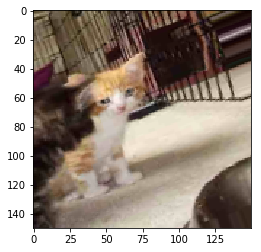

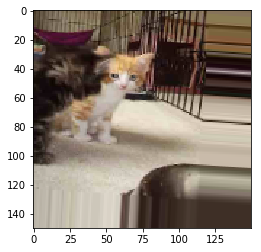

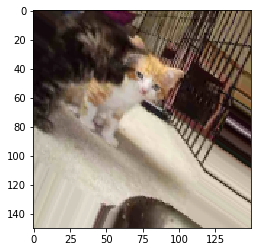

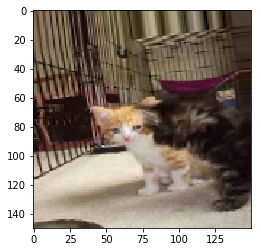

In [6]:
# Augment image
%matplotlib inline
from keras.preprocessing import image
import os
import matplotlib.pyplot as plt


train_cats_dir = '/home/rick/Desktop/machine-learning/small_cats_dogs/train/cats'
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[4] # Chose an image
img = image.load_img(img_path, target_size=(150, 150)) # Resize image to 150 x 150

x = image.img_to_array(img) # Converts it to a Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape) # Reshapes it to (1, 150, 150, 3)
i=0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()


### Train full model 

In [9]:

from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])

train_dir  = '/home/rick/Desktop/machine-learning/small_cats_dogs/train'
validation_dir  = '/home/rick/Desktop/machine-learning/small_cats_dogs/validation'


train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(150, 150),
            batch_size=32,
            class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                validation_dir,
                target_size=(150, 150),
                batch_size=32,
                class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

model.save('cats_and_dogs_small_2.h5')


W0719 08:06:11.010592 140366145513216 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0719 08:06:11.016450 140366145513216 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0719 08:06:11.020965 140366145513216 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/nn_impl.py:180: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 57s 567ms/step - loss: 0.6917 - acc: 0.5103 - val_loss: 0.6791 - val_acc: 0.5717
Epoch 2/100
100/100 [==============================] - 52s 522ms/step - loss: 0.6785 - acc: 0.5772 - val_loss: 0.6761 - val_acc: 0.5483
Epoch 3/100
100/100 [==============================] - 49s 488ms/step - loss: 0.6625 - acc: 0.5894 - val_loss: 0.6454 - val_acc: 0.5996
Epoch 4/100
100/100 [==============================] - 47s 472ms/step - loss: 0.6488 - acc: 0.6181 - val_loss: 0.6377 - val_acc: 0.6140
Epoch 5/100
100/100 [==============================] - 49s 486ms/step - loss: 0.6335 - acc: 0.6341 - val_loss: 0.6420 - val_acc: 0.6225
Epoch 6/100
100/100 [==============================] - 47s 468ms/step - loss: 0.6181 - acc: 0.6512 - val_loss: 0.6038 - val_acc: 0.6488
Epoch 7/100
100/100 [==============================] - 47s 474ms/step - loss: 0.6070 - acc: 0.6588 -

In [13]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

img_path = '/home/rick/Desktop/machine-learning/small_cats_dogs/test_cat.jpeg'
img = image.load_img(img_path, target_size=(150, 150))
print "loaded image \n", img

x = image.img_to_array(img) # image to array of (150, 150, 3)
print "Image to array:\n", x

x = np.expand_dims(x, axis=0) # transform into a batch of size (1, 224, 224, 3)
print "Transformed into a batch \n", x


x = preprocess_input(x) # Preprocesses the batch (this does channel-wise color normalization)
print "Preprocessed \n", x

preds = model.predict(x)

print "Predicted:", preds

loaded image 
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x150 at 0x7FA9320AFDD0>
Image to array:
[[[180. 189. 170.]
  [189. 195. 181.]
  [196. 202. 192.]
  ...
  [175. 159. 162.]
  [179. 163. 166.]
  [191. 175. 178.]]

 [[194. 203. 186.]
  [195. 201. 187.]
  [195. 201. 191.]
  ...
  [189. 173. 176.]
  [188. 172. 175.]
  [185. 169. 172.]]

 [[195. 204. 187.]
  [191. 197. 183.]
  [190. 193. 184.]
  ...
  [171. 155. 158.]
  [174. 158. 161.]
  [176. 160. 163.]]

 ...

 [[180. 190. 202.]
  [187. 197. 209.]
  [197. 207. 219.]
  ...
  [171. 154. 136.]
  [172. 155. 137.]
  [170. 153. 135.]]

 [[199. 209. 221.]
  [201. 211. 223.]
  [206. 216. 228.]
  ...
  [171. 154. 136.]
  [175. 158. 140.]
  [176. 159. 141.]]

 [[211. 221. 233.]
  [210. 220. 232.]
  [210. 220. 232.]
  ...
  [174. 157. 139.]
  [180. 163. 145.]
  [185. 168. 150.]]]
Transformed into a batch 
[[[[180. 189. 170.]
   [189. 195. 181.]
   [196. 202. 192.]
   ...
   [175. 159. 162.]
   [179. 163. 166.]
   [191. 175. 178